In [1]:
import sys

import torch

# * add proj root folder into path
sys.path.append("..")

import pyvinecopulib as pvc

import torchvinecopulib as tvc

print(f"cuda (GPU) avail? {torch.cuda.is_available()}\n")
seed = 0

cuda (GPU) avail? True



In [2]:
# Control parameters for the vine copula fitting
pvc_ctrls = pvc.FitControlsVinecop(
    family_set=[
        pvc.BicopFamily.clayton,
        pvc.BicopFamily.gumbel,
        pvc.BicopFamily.frank,
        pvc.BicopFamily.joe,
        pvc.BicopFamily.gaussian,
        pvc.BicopFamily.indep,
    ],
    parametric_method="itau",
    tree_criterion="tau",
    selection_criterion="aic",
)
tvc_ctrls = {
    "mtd_fit": "itau",
    "mtd_bidep": "kendall_tau",
    "mtd_sel": "aic",
    "tpl_fam": ("Clayton", "Gumbel", "Frank", "Joe", "Gaussian", "Independent"),
}

## Fixing the number of samples, increasing the number of features

In [11]:
num_sim = 1000
lst_num_dim = [5, 10, 20, 40]
for num_dim in lst_num_dim:
    print(f"\n{num_dim=}, {num_sim=}")

    # cuda and cpu data
    V_mvcp_cuda = tvc.vinecop.vcp_from_sim(num_dim=num_dim, seed=seed).sim(
        num_sim=num_sim, device="cuda"
    )
    V_mvcp = V_mvcp_cuda.cpu()

    # fit for tvc (cuda and cpu) and pvc
    cop_tvc_cuda = tvc.vinecop.vcp_from_obs(V_mvcp_cuda, **tvc_ctrls)
    cop_tvc = tvc.vinecop.vcp_from_obs(V_mvcp, **tvc_ctrls)
    cop_pvc = pvc.Vinecop(data=V_mvcp, controls=pvc_ctrls)

    print("simulation")
    %timeit cop_tvc_cuda.sim(num_sim=num_sim, device="cuda")
    %timeit cop_tvc.sim(num_sim=num_sim, device="cpu")
    %timeit cop_pvc.simulate(n=num_sim, num_threads=1)

    print("pdf")
    %timeit cop_tvc_cuda.l_pdf(V_mvcp_cuda)
    %timeit cop_tvc.l_pdf(V_mvcp)
    %timeit cop_pvc.pdf(V_mvcp, num_threads=1)


num_dim=5, num_sim=1000
simulation
12 ms ± 560 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.25 ms ± 33.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.78 ms ± 15 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
pdf
7.88 ms ± 38.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.63 ms ± 88.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.27 ms ± 27.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

num_dim=10, num_sim=1000
simulation
60.8 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
26.4 ms ± 379 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
57.9 ms ± 365 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
pdf
36.2 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
17.6 ms ± 38.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.2 ms ± 295 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

num_dim=20, num_sim=1000
simulation
307 ms ± 5.2 ms per loop (mea

## Fixing the number of features, increasing the number of samples

In [12]:
num_dim = 40
lst_num_sim = [100, 500, 1000, 5000]
for num_sim in lst_num_sim:
    print(f"\n{num_dim=}, {num_sim=}")

    # cuda and cpu data
    V_mvcp_cuda = tvc.vinecop.vcp_from_sim(num_dim=num_dim, seed=seed).sim(
        num_sim=num_sim, device="cuda"
    )
    V_mvcp = V_mvcp_cuda.cpu()

    # fit for tvc (cuda and cpu) and pvc
    cop_tvc_cuda = tvc.vinecop.vcp_from_obs(V_mvcp_cuda, **tvc_ctrls)
    cop_tvc = tvc.vinecop.vcp_from_obs(V_mvcp, **tvc_ctrls)
    cop_pvc = pvc.Vinecop(data=V_mvcp, controls=pvc_ctrls)

    print("simulation")
    %timeit cop_tvc_cuda.sim(num_sim=num_sim, device="cuda")
    %timeit cop_tvc.sim(num_sim=num_sim, device="cpu")
    %timeit cop_pvc.simulate(n=num_sim, num_threads=1)

    print("pdf")
    %timeit cop_tvc_cuda.l_pdf(V_mvcp_cuda)
    %timeit cop_tvc.l_pdf(V_mvcp)
    %timeit cop_pvc.pdf(V_mvcp, num_threads=1)


num_dim=40, num_sim=100
simulation
813 ms ± 13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
271 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
66.3 ms ± 550 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
pdf
441 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
146 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
19.7 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

num_dim=40, num_sim=500
simulation
1.07 s ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
427 ms ± 8.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
456 ms ± 6.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
pdf
581 ms ± 13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
239 ms ± 794 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
118 ms ± 356 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

num_dim=40, num_sim=1000
simulation
1.04 s ± 45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Make it a proper simulation study

In [56]:
import itertools
import time


def sample_one(num_dim, num_sim, seed=1, number=1):
    # cuda and cpu data
    V_mvcp_cuda = tvc.vinecop.vcp_from_sim(num_dim=num_dim, seed=seed).sim(
        num_sim=num_sim, device="cuda"
    )
    V_mvcp = V_mvcp_cuda.cpu()

    exprs = {
        "fit": {
            "tvc_cuda": "cop_tvc_cuda = tvc.vinecop.vcp_from_obs(V_mvcp_cuda, **tvc_ctrls)",
            "tvc": "cop_tvc = tvc.vinecop.vcp_from_obs(V_mvcp, **tvc_ctrls)",
            "pvc": "cop_pvc = pvc.Vinecop(data=V_mvcp, controls=pvc_ctrls)",
        },
        "sim": {
            "tvc_cuda": "cop_tvc_cuda.sim(num_sim=num_sim, device='cuda')",
            "tvc": "cop_tvc.sim(num_sim=num_sim, device='cpu')",
            "pvc": "cop_pvc.simulate(n=num_sim, num_threads=1)",
        },
        "pdf": {
            "tvc_cuda": "torch.exp(cop_tvc_cuda.l_pdf(V_mvcp_cuda))",
            "tvc": "torch.exp(cop_tvc.l_pdf(V_mvcp))",
            "pvc": "cop_pvc.pdf(V_mvcp, num_threads=1)",
        },
    }

    # Save the %timeit results
    results = {"num_dim": num_dim, "num_sim": num_sim, "seed": seed}
    for key, exprs_dict in exprs.items():
        results[key] = {}
        for name, expr in exprs_dict.items():
            start_time = time.time()
            for _ in range(number):
                exec(expr)
            end_time = time.time()
            results[key][name] = end_time - start_time

    return results


# Create a grid of simulation sizes and dimensions
lst_num_sim = [100, 500, 1000]
lst_num_dim = [10, 20, 40]
n_seeds = 4
results = []
for num_sim, num_dim, seed in itertools.product(
    *[lst_num_sim, lst_num_dim, range(n_seeds)]
):
    results.append(sample_one(num_dim, num_sim, seed))


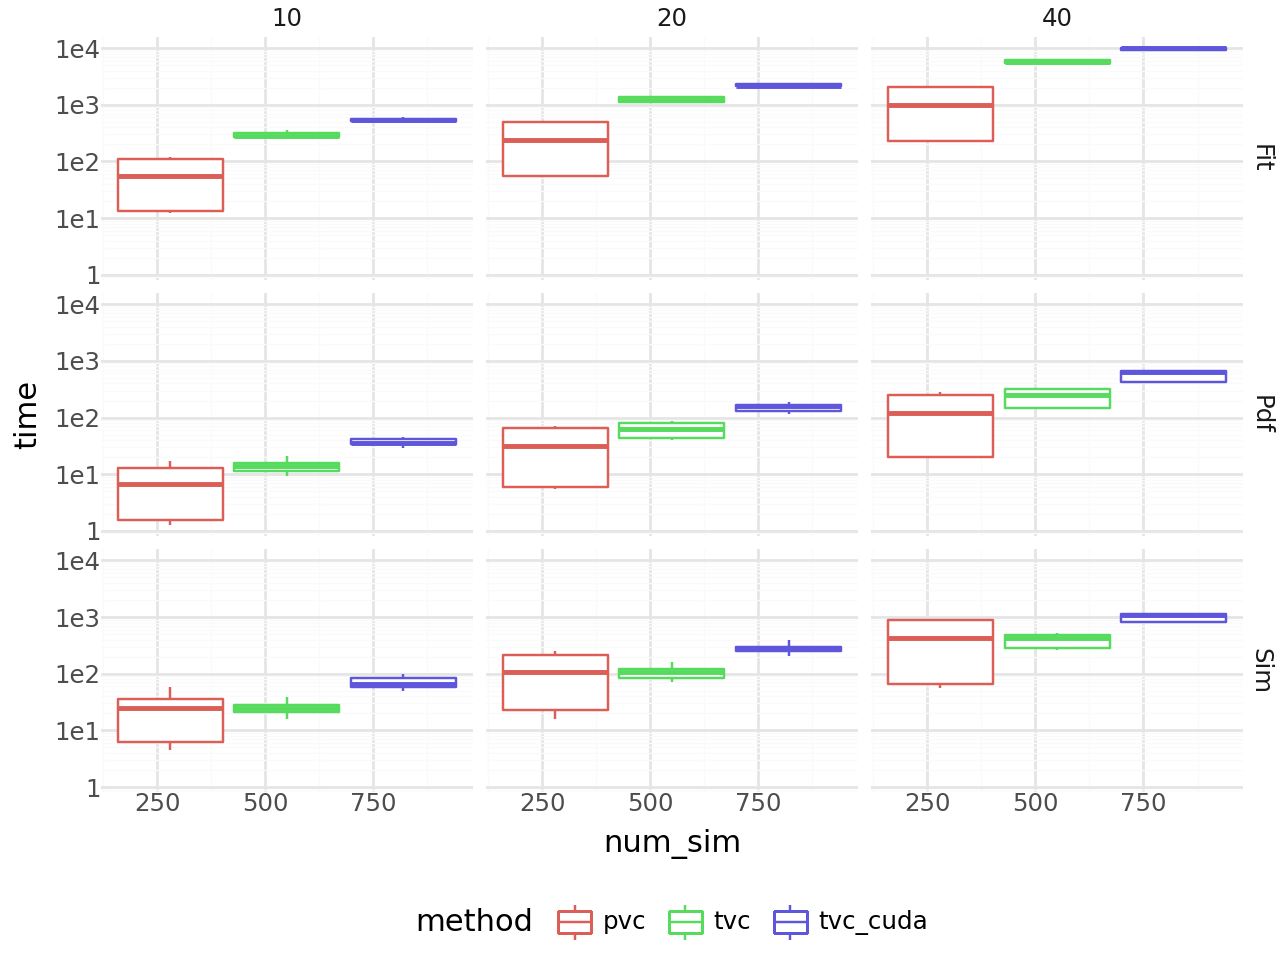

In [59]:
import pandas as pd
import plotnine as p9

df = pd.DataFrame(results).melt(
    id_vars=["num_dim", "num_sim", "seed"], var_name="type", value_name="time"
)
df_time = pd.json_normalize(df["time"])
# Concatenate the new columns with the original DataFrame, dropping the old 'time' column
df = pd.concat([df.drop(columns=["time"]), df_time], axis=1).melt(
    id_vars=["num_dim", "num_sim", "seed", "type"],
    var_name="method",
    value_name="time",
)


df["type"] = df["type"].str.replace("_", " ").str.capitalize()
df["time"] = df["time"] * 1000  # Convert to milliseconds

(
    p9.ggplot(df, p9.aes(x="num_sim", y="time", color="method"))
    + p9.geom_boxplot()
    + p9.facet_grid("type", "num_dim")
    + p9.scale_y_log10()
    + p9.theme_minimal()
    + p9.theme(legend_position="bottom")
)